<a href="https://colab.research.google.com/github/Harshubh-Meherishi/Neural-Networks-with-PyTorch/blob/master/Neural_Networks_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [7]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)

In [8]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle=True)

In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


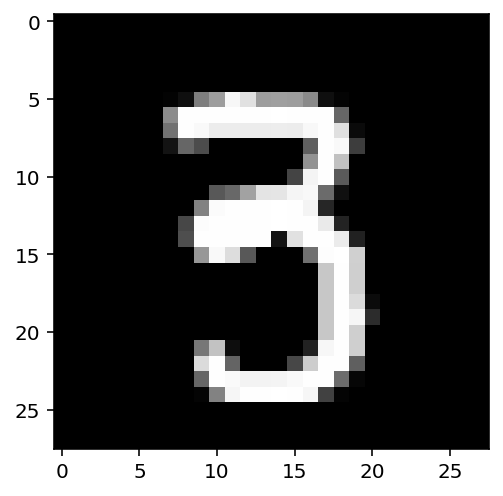

In [10]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

In [13]:
def activation(x):
  return 1/(1+torch.exp(-x))

images.shape[0]

64

In [18]:
inputs = images.view(images.shape[0],-1)

w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)
out = torch.mm(h,w2) + b2 

print(out.shape)

torch.Size([64, 10])


In [20]:
def softmax_v1(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim =1 ).view(-1,1)

probabilities = softmax_v1(out)
print(probabilities.shape)

torch.Size([64, 10])


## Building networks with PyTorch

In [21]:
from torch import nn

In [22]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10) 

    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim =1)

  def forward(self,x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x


In [23]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

# Practice 

In [27]:
import torch.nn.functional as F
class Practice(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x),dim =1)

model = Practice()
model

Practice(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)